In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from datetime import datetime,timedelta
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#ftech the data from google trends
pytrends=TrendReq(hl='en-US',tz=330)

In [3]:
#choose the keywords to analyze
keywords=['Artificial Intelligence','Machine Learning','Data Analytics']

In [4]:
# Define timeframe of last 6 months
end_date=datetime.now()
start_date=end_date-timedelta(days=180)
timeframe=start_date.strftime('%Y-%m-%d')+' '+end_date.strftime('%Y-%m-%d')

In [5]:
# Define timeframe of last 6 months
pytrends.build_payload(keywords,timeframe=timeframe)
gt=pytrends.interest_over_time()
df=gt.copy()
df.head()

,Artificial Intelligence,Machine Learning,Data Analytics,isPartial
date,,,,
2025-02-28,26,35,15,False
2025-03-01,28,31,15,False
2025-03-02,26,28,13,False
2025-03-03,28,38,18,False
2025-03-04,29,36,17,False


In [6]:
df=df.drop(columns=['isPartial'])
df.head()

,Artificial Intelligence,Machine Learning,Data Analytics
date,,,
2025-02-28,26,35,15
2025-03-01,28,31,15
2025-03-02,26,28,13
2025-03-03,28,38,18
2025-03-04,29,36,17


In [7]:
# Prophet requires dataframe with columns 'ds' (date) and 'y' (value)

def prepare_prophet_df(series):
    df_prophet = pd.DataFrame()
    df_prophet['ds'] = series.index
    df_prophet['y'] = series.values
    return df_prophet

In [8]:
# Step 3: Forecasting function using Prophet

def prophet_forecast(keyword, df, periods=30):
    print(f"\nForecasting for keyword: {keyword}")
    data = prepare_prophet_df(df[keyword])
    
    # Train-test split (80-20)
    train_size = int(len(data) * 0.8)
    train_df = data.iloc[:train_size]
    test_df = data.iloc[train_size:]
    
    # Initialize and fit Prophet model
    model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=True)
    model.fit(train_df)
    
    # Create dataframe for future dates equal to test set length
    future = model.make_future_dataframe(periods=len(test_df), freq='D')
    
    # Forecast
    forecast = model.predict(future)

    # Plot forecast
    model.plot(forecast)
    plt.title(f'Prophet Forecast for {keyword}')
    plt.xlabel('Date')
    plt.ylabel('Interest')
    plt.show()

    # Evaluate the forecast on test data
    forecasted = forecast['yhat'].iloc[-len(test_df):].values
    actual = test_df['y'].values
    
    rmse = np.sqrt(mean_squared_error(actual, forecasted))
    print(f'RMSE for {keyword} forecast: {rmse:.3f}')
    

    # Plot actual vs forecast
    plt.figure(figsize=(12,6))
    plt.plot(test_df['ds'], actual, label='Actual')
    plt.plot(test_df['ds'], forecasted, label='Forecast')
    plt.title(f'Actual vs Forecast: {keyword}')
    plt.xlabel('Date')
    plt.ylabel('Interest')
    plt.legend()
    plt.grid(True)
    plt.show()

22:52:54 - cmdstanpy - INFO - Chain [1] start processing



Forecasting for keyword: Artificial Intelligence


22:52:54 - cmdstanpy - INFO - Chain [1] done processing


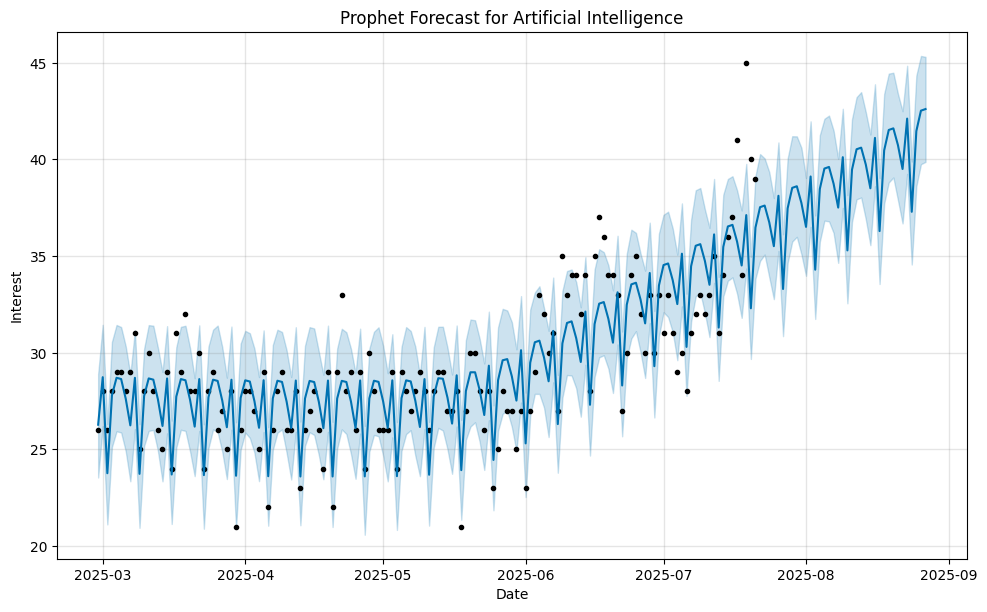

RMSE for Artificial Intelligence forecast: 18.638


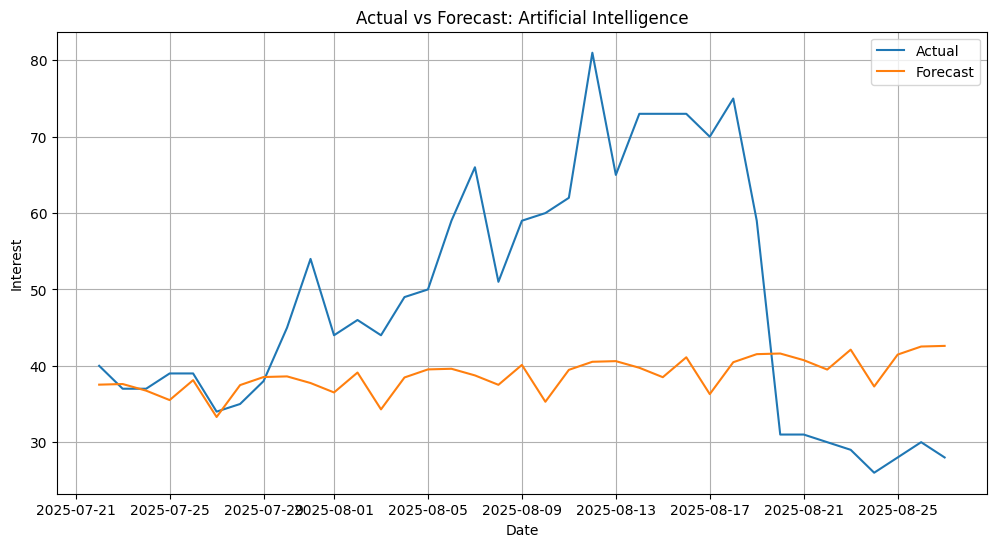

22:52:55 - cmdstanpy - INFO - Chain [1] start processing
22:52:55 - cmdstanpy - INFO - Chain [1] done processing



Forecasting for keyword: Machine Learning


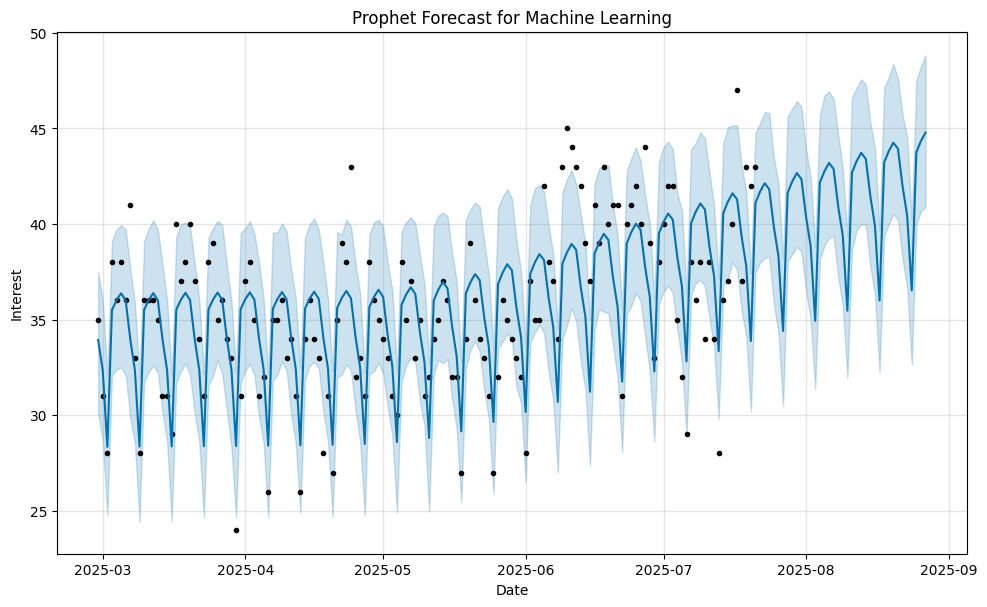

RMSE for Machine Learning forecast: 24.555


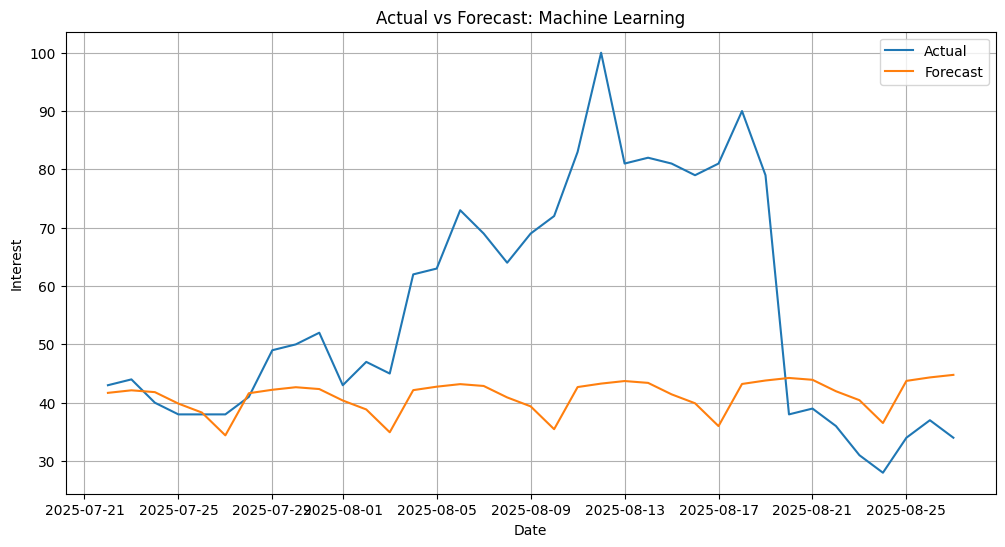

22:52:55 - cmdstanpy - INFO - Chain [1] start processing
22:52:55 - cmdstanpy - INFO - Chain [1] done processing



Forecasting for keyword: Data Analytics


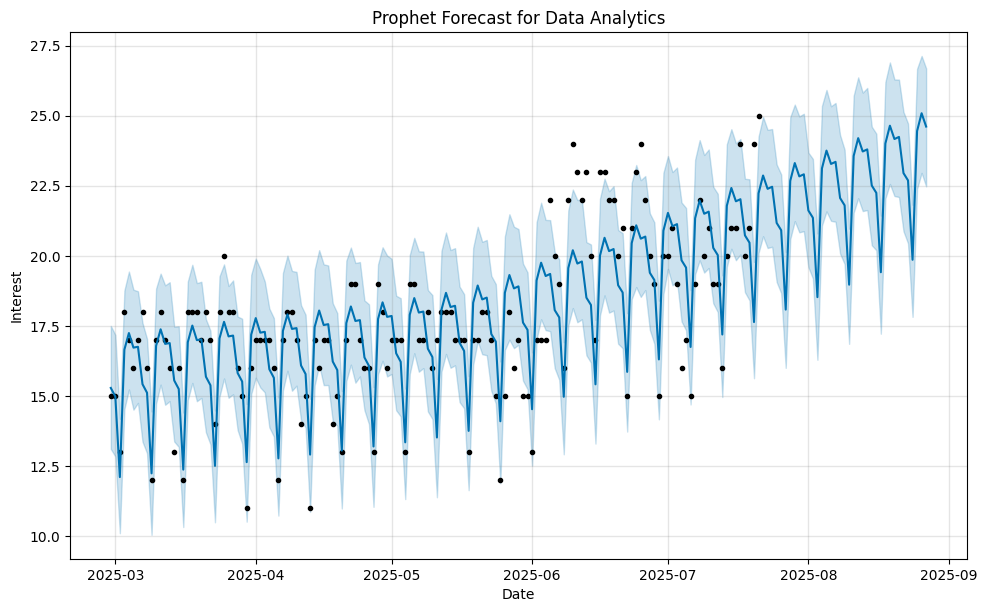

RMSE for Data Analytics forecast: 8.417


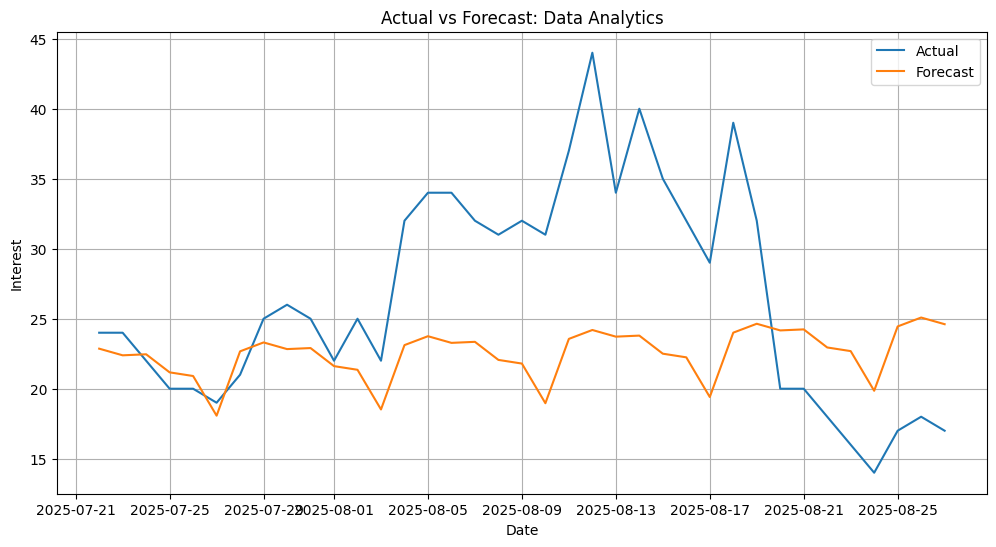

In [9]:
# Step 4: Run forecasting for each keyword

for kw in keywords:
    prophet_forecast(kw, df)